In [8]:
import requests
import datetime

response = requests.get("https://migalabs.es/api/v1/active-nodes?crawler=eth-cl-mainnet")
node_count = int(response.json()['active_nodes'])
timestamp = datetime.datetime.now().date()

def consumption(node_count):
    # Hardware assumed to be a NUC with high utilisation 
    wattage = 45
    # Converting to GWh 
    annualised_consumption = wattage * node_count * 24 * 365.25 / 1000000000
    return annualised_consumption

print("Daily consumption:",str(consumption(node_count)/365.25*1000)+"MWh")
print("Annualised consumption:",str(consumption(node_count))+"GWh")

Daily consumption: 4.404240000000001MWh
Annualised consumption: 1.60864866GWh


In [9]:
import pandas as pd

historical_data = pd.read_csv("data/beacon_chain_active_nodes_2022-07-22T16_00_27.81918Z.csv")

# Start date 04-02-2022
historical_data = historical_data.append({'Date':timestamp,'Active Nodes':node_count}, ignore_index=True)
historical_data['Date'] = pd.to_datetime(historical_data['Date']).dt.date

/var/folders/n6/lkbsj4gd0s37jql1nwj1hh3w0000gn/T/ipykernel_28751/2649583528.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  historical_data = historical_data.append({'Date':timestamp,'Active Nodes':node_count}, ignore_index=True)


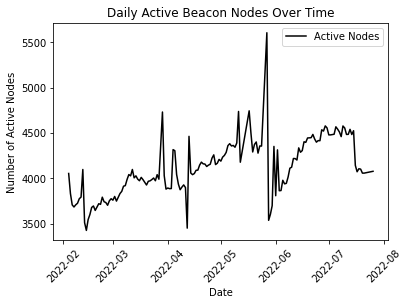

In [10]:
import matplotlib.pyplot as plt

historical_data.plot(x="Date", y="Active Nodes", color = 'k')
plt.title("Daily Active Beacon Nodes Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Active Nodes")
plt.xticks(rotation=45)
plt.show()


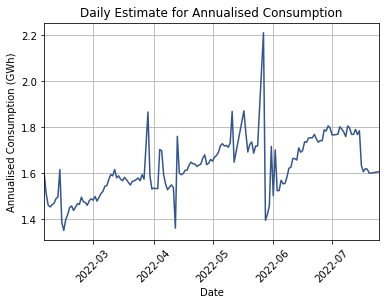

In [11]:
# Create new column in df with annualised consumption data
historical_data['Annualised Consumption'] = historical_data['Active Nodes'].apply(consumption)

historical_data.plot(x="Date", y="Annualised Consumption", color = '#34568B', legend = None)
plt.title("Daily Estimate for Annualised Consumption")
plt.xlabel("Date")
plt.ylabel("Annualised Consumption (GWh)")
left = datetime.date(2022, 2, 4)
right = datetime.date(2022, 7, 25)
plt.xlim(left,right)
plt.grid()
plt.xticks(rotation=45)
plt.savefig('Annualised Consumption.png', dpi=600, bbox_inches='tight')
plt.show()



In [12]:
print(historical_data)

           Date  Active Nodes  Annualised Consumption
0    2022-02-04          4054                1.599181
1    2022-02-05          3833                1.512004
2    2022-02-06          3708                1.462695
3    2022-02-07          3685                1.453622
4    2022-02-08          3709                1.463089
..          ...           ...                     ...
157  2022-07-18          4106                1.619694
158  2022-07-19          4102                1.618116
159  2022-07-20          4058                1.600759
160  2022-07-21          4058                1.600759
161  2022-07-26          4078                1.608649

[162 rows x 3 columns]
